````
importing the required modules
````

In [27]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import os
import pickle

````
importing the dataset from specified directory
& assigning the number to the allphabet labels
````

In [2]:
ds = tf.keras.preprocessing.image_dataset_from_directory("imgs/train")
c = 0
dic = {}
for i in ds.class_names:
    if i in dic:
        pass
    else:
        dic[c] = i
    c+=1

Found 22424 files belonging to 10 classes.


In [3]:
print(dic)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


In [4]:
data = []
label = []
count = 0

````
converting the image to the array for training the model
````

In [5]:
import glob
l = ds.class_names
for i in l:
    for j in glob.glob(f"imgs/train/{i}/*.*"):
        image = tf.keras.preprocessing.image.load_img(j,color_mode="grayscale",target_size=(64,64))
        image = np.array(image)
        data.append(image)
        label.append(count)
    count += 1

````
converting the array to the ndarray
````

In [6]:
data = np.array(data)
label = np.array(label)

In [7]:
data = np.array(data)/255.0

````
assigning the train and test dataset through train_test_split class of the sklearn.metrics
````

In [8]:
len(data)

22424

````
plotting the data through the matplotlib library for visual representation of the image
````

Text(0.5, 1.0, '6')

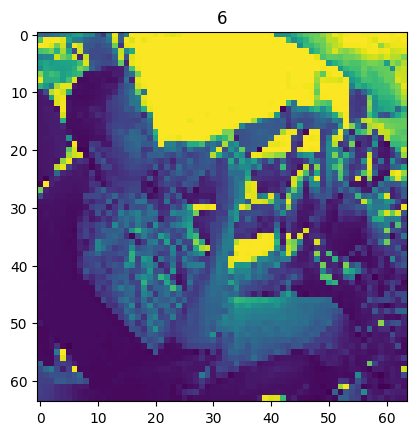

In [9]:
plt.imshow(data[15000])
plt.title(dic[label[15000]])

````
building the convolutional neural network for prediction
````

In [10]:
model = tf.keras.Sequential([
  keras.layers.Conv2D(16, (2,2), input_shape=(64,64,1), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

	keras.layers.Conv2D(32, (3,3), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'),

	keras.layers.Conv2D(64, (5,5), activation='relu'),
	keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'),
	
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dropout(0.2),
	keras.layers.Dense(28, activation='softmax')
])

````
compiling the model with the loss, optimizer & metrics

In [11]:
model.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metrics = ['accuracy']
)

````
fitting the model with the train data image array is used as X_train data and label array is used as y_train
````

In [12]:
model.fit(data,label,epochs=10,batch_size=26,verbose=1)

Epoch 1/10
863/863 [==============================] - 74s 77ms/step - loss: 1.3100 - accuracy: 0.5396
Epoch 2/10
863/863 [==============================] - 62s 72ms/step - loss: 0.2272 - accuracy: 0.9348
Epoch 3/10
863/863 [==============================] - 60s 70ms/step - loss: 0.1217 - accuracy: 0.9656
Epoch 4/10
863/863 [==============================] - 60s 70ms/step - loss: 0.0824 - accuracy: 0.9759
Epoch 5/10
863/863 [==============================] - 68s 78ms/step - loss: 0.0639 - accuracy: 0.9805
Epoch 6/10
863/863 [==============================] - 62s 72ms/step - loss: 0.0485 - accuracy: 0.9856
Epoch 7/10
863/863 [==============================] - 62s 72ms/step - loss: 0.0439 - accuracy: 0.9860
Epoch 8/10
863/863 [==============================] - 62s 72ms/step - loss: 0.0362 - accuracy: 0.9879
Epoch 9/10
863/863 [==============================] - 65s 76ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 10/10
863/863 [==============================] - 63s 73ms/step - loss: 0.032

````
saving the model using tensorflow
````

In [13]:
model.save("model.h5")

````
preparing the test model
````

In [131]:
test_data = []
test_label = []

In [132]:
for j in glob.glob(f"imgs/test/*.*"):
    image = tf.keras.preprocessing.image.load_img(j,color_mode="grayscale",target_size=(64,64))
    image = np.array(image)
    test_data.append(image)

In [133]:
test_data = np.array(test_data)
test_label = np.array(test_label)

In [134]:
test_data = test_data/255.0

In [135]:
len(test_data)

79726

In [136]:
pred = model.predict(test_data)

2492/2492 [==============================] - 125s 32ms/step


In [137]:
pred = [np.argmax(i) for i in pred]

test data prepataion for RandomForestClassifier

In [14]:
nsamples, nx, ny = data.shape

In [15]:
data_de = data.reshape(nsamples, nx*ny)

In [16]:
data_de.shape

(22424, 4096)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(data_de,label)

RandomForestClassifier()

In [ ]:
nsamples, nx, ny = test_data.shape
test_data_de = test_data.reshape(nsamples, nx*ny)
pred1 = model1.predict(test_data_de)

In [ ]:
import pickle
pickle.dump(model1, open("random_forest.pkl", "wb"))

Naive Bayes Classifiers

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(data_de, label)

GaussianNB()

In [ ]:
pred2 = gnb.predict(test_data_de)

In [29]:
pickle.dump(gnb, open("gnb.pkl", "wb"))

Support Vector Machine Algorithm

In [19]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(data_de, label)

c:\Users\venkatesh\Desktop\cvpro\cv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
pred3 = lsvc.predict(test_data_de)

In [28]:
pickle.dump(lsvc, open("lsvc.pkl", "wb"))

spltting data for calculation testing accoracy of the models

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, label)
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_de, label)

In [22]:
model.evaluate(x_test, y_test)

176/176 [==============================] - 10s 23ms/step - loss: 0.0138 - accuracy: 0.9948


[0.013786994852125645, 0.9948269724845886]

In [23]:
model1.score(x_test1, y_test1)

1.0

In [24]:
gnb.score(x_test1, y_test1)

0.560114163396361

In [25]:
lsvc.score(x_test1, y_test1)

1.0